### MLP Practice 1

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print(x_train[0:3]) # .head() can only be used with DataFrame
print(y_train[0:3])
print(x_test[0:3])
print(y_test[0:3])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[7 2 1]


### Normalization

In [5]:
gray_scale = 255
x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale
print(x_train[0].shape)
print(x_test[0].shape)

(28, 28)
(28, 28)


### Visualization

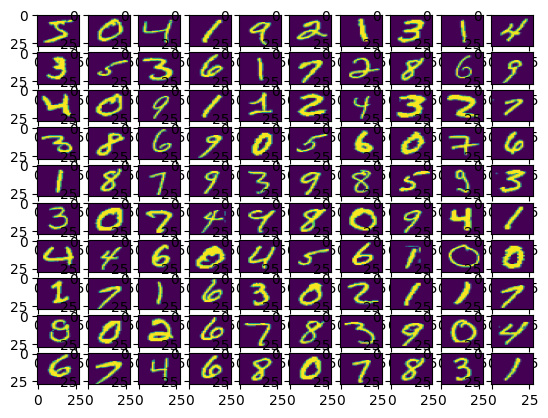

In [6]:
fig, ax = plt.subplots(10, 10) # fig is a canvas.
                               # ax is a 10x10 ndarray
k = 0
for i in range(10):
  for j in range(10):
    ax[i][j].imshow(x_train[k], aspect='auto') # .imshow displays data as an image, i.e., on a 2D regular raster.
    k += 1
plt.show()

### Building NLP

In [7]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(10, activation='softmax'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compiling the model

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [10]:
mod = model.fit(x_train, y_train, epochs=10,
                batch_size=2000,
                validation_split=0.2) # Evaluate over validation sets
                                      # Return a History object. Its History.history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

print(mod)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.2679 - loss: 2.2211 - val_accuracy: 0.7069 - val_loss: 1.7107
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7056 - loss: 1.5305 - val_accuracy: 0.8052 - val_loss: 1.0146
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8019 - loss: 0.9342 - val_accuracy: 0.8625 - val_loss: 0.6617
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8569 - loss: 0.6397 - val_accuracy: 0.8878 - val_loss: 0.4911
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8820 - loss: 0.4904 - val_accuracy: 0.9001 - val_loss: 0.4048
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8965 - loss: 0.4089 - val_accuracy: 0.9088 - val_loss: 0.3546
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9027 - loss: 0.3676 - val_accuracy: 0.9137 - val_loss: 0.3211
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9121 - loss: 0.3268 - val_accuracy: 0.9195 - val_loss

### Testing

In [11]:
results = model.evaluate(x_test, y_test, verbose=0) # Evaluate over test sets
print('Test loss, Test accuracy:', results)

Test loss, Test accuracy: [0.26762598752975464, 0.9251000285148621]


### Plotting the results

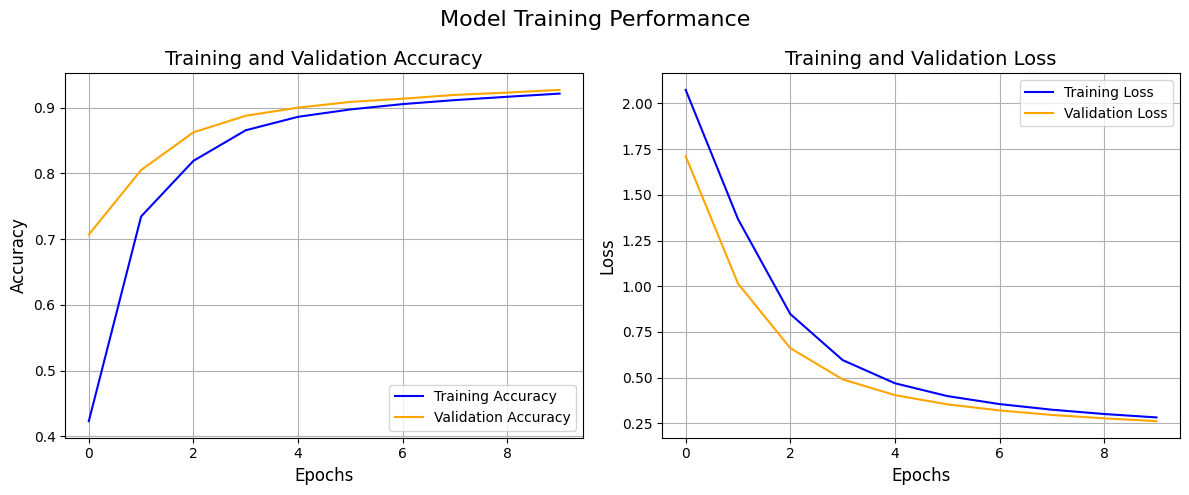

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1) # Plot two plots(1,2) on canvas, signifying the first plot
plt.plot(mod.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(mod.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend() # Place a legend on the Axes
plt.grid(True)

plt.subplot(1, 2, 2) # Signifying the second plot
plt.plot(mod.history['loss'], label='Training Loss', color='blue')
plt.plot(mod.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout() # Automatically adjust spacing
plt.show()